# Logistic regression 
Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for binary classification problems.

Refs: [SKLearn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) <br> 
And [Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) 

We will use the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic) data set for this model and try to **predict a passenger: survived or deceased**  

In [34]:
#importing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [35]:
#Load csv data 
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory data analysis (EDA) 

<AxesSubplot:>

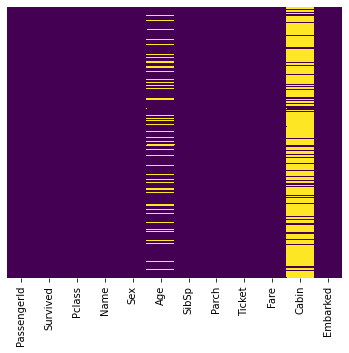

In [38]:
#heatmap for looking at the missing data 
plt.figure(figsize=(6,5))
sns.heatmap(titanic.isnull(),cmap='viridis',yticklabels=False,cbar=False)

**We see that Age and Cabin columns have missing data. We may drop Cabin column, since it has too much missing data** 

<AxesSubplot:xlabel='Survived', ylabel='count'>

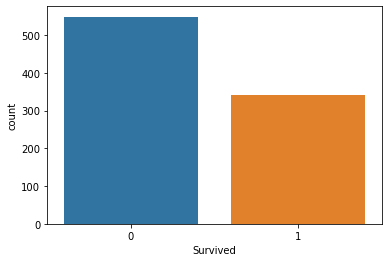

In [39]:
#countplot to check the Survived column 
sns.countplot(x='Survived',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

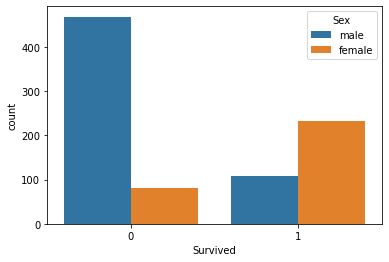

In [40]:
#countplot to check the Survived column with hue set to sex  
sns.countplot(x='Survived',data=titanic, hue='Sex')

**More females are in the survived column then males** 

<AxesSubplot:xlabel='Survived', ylabel='count'>

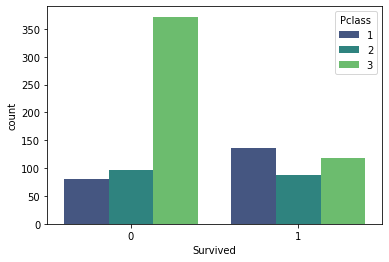

In [41]:
#countplot to check the Survived column with hue set to sex  
sns.countplot(x='Survived',data=titanic, hue='Pclass', palette='viridis')

**More peoples are on the non-survived column of class 3 than class 2 and 1.** 

In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


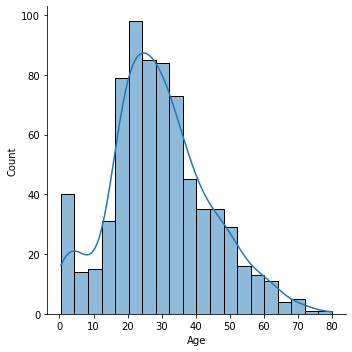

In [43]:
#Displot to see the ages of the passengers 
sns.displot(titanic['Age'].dropna(),kde=True)

**Majority passengers were in the age range of 20-30** 

In [44]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='SibSp', ylabel='count'>

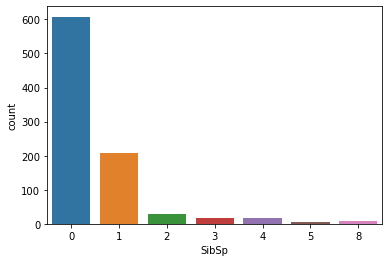

In [45]:
#Countplot for number of siblings onboard 
sns.countplot(data=titanic,x='SibSp')

**Most of the passengers had 0 siblings onboard**

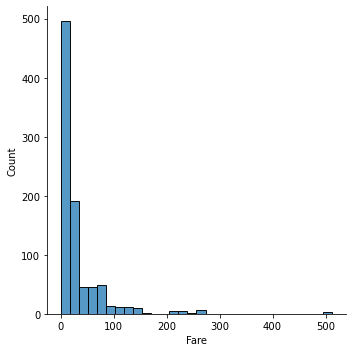

In [46]:
sns.displot(titanic['Fare'],bins=30)

**Most of the passengers were with lower fare (economic clas)**

## Cufflinks for interactive plot 
Interactive visulation with plotly and Cufflinks

https://medium.com/analytics-vidhya/interactive-visualizations-with-plotly-and-cufflinks-9ffd032bfac#:~:text=Cufflinks%20essentially%20connects%20Pandas%20(from,nothing%20really%20special%20or%20unique.

In [47]:
import cufflinks as cf
cf.go_offline()

In [48]:
titanic['Fare'].iplot(kind='hist',bins=30)

In [49]:
titanic['SibSp'].iplot(kind='hist',bins=20)

## Data cleaning 

<AxesSubplot:>

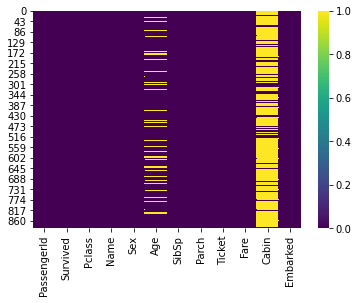

In [50]:
#sns.heatmap(titanic.isnull(),cmap='viridis')
sns.heatmap(titanic.isnull(),cmap='viridis')

We will fillup the missing value in *Age* column and delete the cabin column since there are too much missing value in *Cabin* column  

In [51]:
#number of rows
titanic.index.stop

891

In [52]:
#number of missing value for age column
sum(titanic['Age'].isnull())

177

In [53]:
# %of missing values in Age column 
sum(titanic['Age'].isnull())*100/titanic['PassengerId'].count()

19.865319865319865

In [54]:
## %of missing values in Cabin column 
sum(titanic['Cabin'].isnull())*100/titanic['PassengerId'].count()

77.10437710437711

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

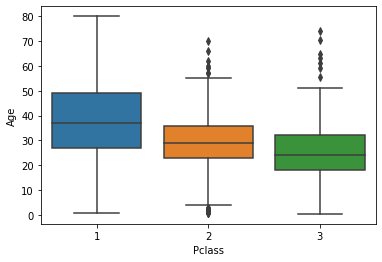

In [55]:
#Create a box plot of passenger age with classes to see the age distribution 
sns.boxplot(data=titanic,x='Pclass',y='Age')

*Since different classes have different mean age values, instead of replacing the missing age 
value by a single mean value, we will replace (imputation) them by the class mean* 

In [56]:
#mean age of class 1
titanic[titanic['Pclass']==1]['Age'].mean()

38.233440860215055

In [57]:
#mean age of class 2
titanic[titanic['Pclass']==2]['Age'].mean()

29.87763005780347

In [58]:
#mean age of class 3
titanic[titanic['Pclass']==3]['Age'].mean()

25.14061971830986

### imputation method 

In [59]:
def impute(col):
    age = col[0] 
    pclass = col[1]
    
    if pd.isnull(age):
        return titanic[titanic['Pclass']==pclass]['Age'].mean()
#         if pclass == 1: 
#             return titanic[titanic['Pclass']==1]['Age'].mean()
#         elif pclass ==2:
#             return titanic[titanic['Pclass']==2]['Age'].mean()
#         else: 
#             return titanic[titanic['Pclass']==3]['Age'].mean()
    else:
        return age
    

In [60]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute,axis=1)

In [61]:
titanic['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

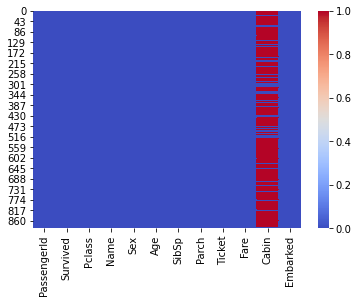

In [62]:
sns.heatmap(titanic.isnull(),cmap='coolwarm')

*All the missing data in age columns are gone. Since Cabin has a lot of missing data we will simply drop the 'Cabin' column*

In [63]:
#Drop Cabin column

titanic.drop('Cabin',axis=1,inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


There are two Embarked missing data. Simple delete those rows.

In [65]:
#two columns have Embarked null values: drop those two rows 
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [66]:
#drop them 
titanic.dropna(inplace=True)

In [67]:
#now there is no such rows
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [68]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting categorical features into numerical values 

In [69]:
titanic['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [70]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Three types of Embarked 

In [71]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
#Get dummies for Sex column
titanic['male'] = pd.get_dummies(titanic['Sex'],drop_first=True)

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [74]:
#get dummies for Embarked column
titanic[['Q','S']] = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [75]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [76]:
#drop the repeating and unncessary columns 
titanic.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [77]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Building the model 

In [78]:
#Split the train and test data 
from sklearn.model_selection import train_test_split
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [79]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.00000,0,0,7.7750,0,0,1
651,2,18.00000,0,1,23.0000,0,0,1
2,3,26.00000,0,0,7.9250,0,0,1
690,1,31.00000,1,0,57.0000,1,0,1
196,3,25.14062,0,0,7.7500,1,1,0
...,...,...,...,...,...,...,...,...
576,2,34.00000,0,0,13.0000,0,0,1
840,3,20.00000,0,0,7.9250,1,0,1
338,3,45.00000,0,0,8.0500,1,0,1
524,3,25.14062,0,0,7.2292,1,0,0


## Train the model 

In [80]:
#importing 

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(max_iter=400)

In [81]:
#lm.fit(X_train,y_train)
lm.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [82]:
lm.coef_

array([[-1.09906715e+00, -4.17606654e-02, -2.48265447e-01,
        -9.13340282e-02,  1.62386799e-03, -2.47686781e+00,
        -1.03830696e-01, -3.33884427e-01]])

In [83]:
#predict = lm.predict(X_test)
predict = lm.predict(X_test)

## Evaluation
https://en.wikipedia.org/wiki/Confusion_matrix

In [84]:
#from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [85]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [86]:
print(confusion_matrix(y_test,predict))

[[150  13]
 [ 31  73]]


In [102]:
conf = confusion_matrix(y_test,predict)
TP, FN, FP, TN = conf.ravel()

In [103]:
print("FP",FP)

FP 31


In [104]:
print("TN",TN)

TN 73


In [105]:
#pip install pycm

In [95]:
##To check FP and FN value
from pycm import ConfusionMatrix

In [99]:
type(np.array(y_test))

numpy.ndarray

In [98]:
type(predict)

numpy.ndarray

In [106]:
#It shows the detail result of the confusion matrix  
print(ConfusionMatrix(np.array(y_test),predict))

Predict   0         1         
Actual
0         150       13        

1         31        73        





Overall Statistics : 

95% CI                                                            (0.79071,0.87971)
ACC Macro                                                         0.83521
ARI                                                               0.44428
AUNP                                                              0.81108
AUNU                                                              0.81108
Bangdiwala B                                                      0.72383
Bennett S                                                         0.67041
CBA                                                               0.76533
CSI                                                               0.64987
Chi-Squared                                                       112.55666
Chi-Squared DF                                                    1
Conditional Entropy                                

In [52]:
print(accuracy_score(y_test,predict))

0.8352059925093633


In [53]:
#total survived count  
titanic[titanic['Survived']==1]['Survived'].count()

340

In [54]:
#total not survived count 
titanic[titanic['Survived']==0]['Survived'].count()

549

In [55]:
#Confusion matrix Sample size
150+13+31+73

267

In [56]:
#Accuracy
(150+73)/267

0.8352059925093633

In [57]:
#Precision for class 0
150/(150+31)

0.8287292817679558

In [31]:
#Recall for class 0
150/(150+13)

0.9202453987730062

# Very Good